In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from collections import defaultdict
from scipy import stats

In [42]:
transactions = pd.read_csv("./data/dh_transactions.csv")
products = pd.read_csv("./data/dh_product_lookup.csv")

In [43]:
data = transactions.join(products.set_index('upc'),on = "upc")

In [44]:
baskets = data.groupby(['basket'])

In [57]:
weeks = (baskets['week'].sum()/baskets.size())

In [58]:
basket_per_weeks = weeks.value_counts().sort_index()

# Coupon Relationship with Number of Customers/Sales

In [45]:
# Number of coupon used each week
coupon_usage = data[data["coupon"] == 1]["week"].value_counts().sort_index()

Text(0.5, 1.0, '3.1 Amount of Customers that use Coupons')

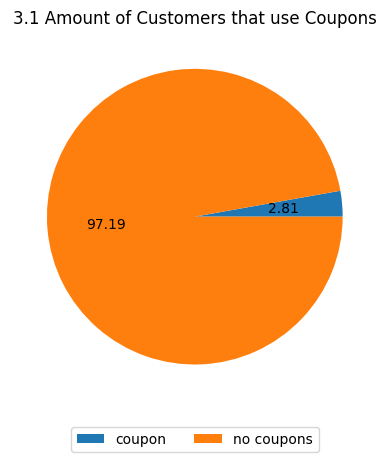

In [94]:
plt.pie([coupon_usage.sum(), len(baskets) - coupon_usage.sum() ], labels = ["coupon", "no coupons"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("3.1 Amount of Customers that use Coupons")

Text(0.5, 1.0, '3.2 Coupon usage in each year')

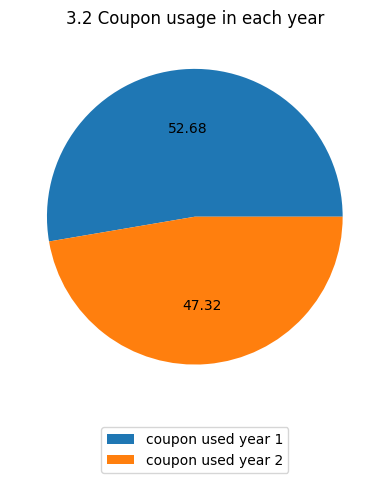

In [203]:
plt.pie([coupon_usage[:53].sum(),coupon_usage[54:].sum()],labels = ["coupon used year 1", "coupon used year 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=1)
plt.title("3.2 Coupon usage in each year")

In [48]:
coupon_geo_location_1 = len(data[data["coupon"] == 1][data["geography"] == 1])
coupon_geo_location_2 = len(data[data["coupon"] == 1][data["geography"] == 2])

/var/folders/lc/b2zpsxhx5wj0p33dk9d2hplh0000gn/T/ipykernel_86695/2597126501.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coupon_geo_location_1 = len(data[data["coupon"] == 1][data["geography"] == 1])
/var/folders/lc/b2zpsxhx5wj0p33dk9d2hplh0000gn/T/ipykernel_86695/2597126501.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  coupon_geo_location_2 = len(data[data["coupon"] == 1][data["geography"] == 2])


Text(0.5, 1.0, '3.3 Coupon Usage in Each Area')

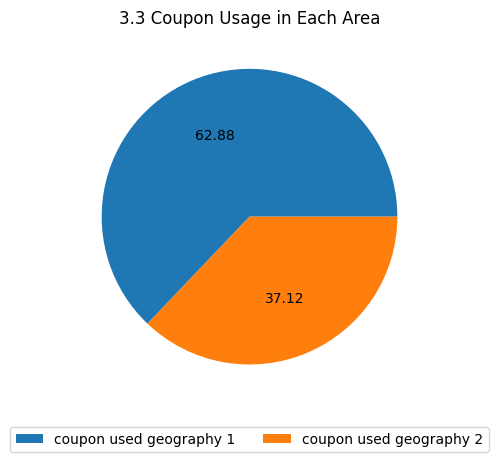

In [96]:
plt.pie([coupon_geo_location_1,coupon_geo_location_2],labels = ["coupon used geography 1", "coupon used geography 2"], labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("3.3 Coupon Usage in Each Area")

In [60]:
stats.pearsonr(coupon_usage,basket_per_weeks)

PearsonRResult(statistic=0.5411638124571476, pvalue=3.009613508757524e-09)

In [61]:
sale_per_weeks = baskets['dollar_sales'].sum()

In [62]:
sale_each_weeks = np.zeros(105)
for idx,val in sale_per_weeks.items():
    sale_each_weeks[int(weeks[idx])] += val

In [73]:
stats.pearsonr(coupon_usage,sale_each_weeks[1:])

PearsonRResult(statistic=0.5569491616027091, pvalue=8.261205250431469e-10)

In [71]:
stats.pearsonr(coupon_usage[:52],sale_each_weeks[1:53])

PearsonRResult(statistic=0.5666872187195253, pvalue=1.189434054013174e-05)

In [70]:
stats.pearsonr(coupon_usage[52:],sale_each_weeks[53:])

PearsonRResult(statistic=0.6314816571978292, pvalue=5.177714019323421e-07)

## Conclusion
Assuming All Coupon we give out are used by customers with in a year.

1. Coupons have significantly strong positive correlation with both our sale and number of customers.
2. We distributed less coupons on the second year but according plot 1.1 and 1.3 both our sale and number of customers are increasing  in second year.
3. Customers in location 2 are more organically engaged with our shop since we only distributed 1/3 of our coupons in that area but our sale and number of customers are almost evenly distributed between 2 locations according to plot 1.11 and 1.12.
4. Since the correlation between amount of coupons and our sale or number of customers are both strongly positive, it is possible for us to distributed more coupons per year in the future to attract more customers.

# Coupon Relationship with Products

In [84]:
coupon_by_commodity = data[data["coupon"] == 1]["commodity"].value_counts()

Text(0.5, 1.0, '3.4 Coupon Usage by Commodities')

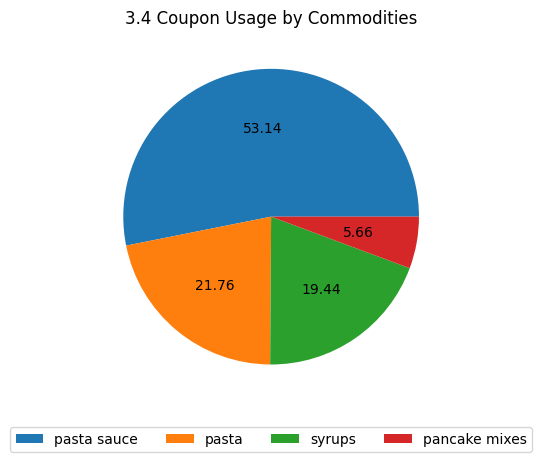

In [97]:
plt.pie(coupon_by_commodity.values,labels = coupon_by_commodity.index, labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("3.4 Coupon Usage by Commodities")

In [89]:
coupon_by_brand = data[data["coupon"] == 1]["brand"].value_counts()

In [108]:
# Remove some data with low frequency
coupon_by_brand = coupon_by_brand[coupon_by_brand > 500]

Text(0.5, 1.0, '3.5 Coupon Usage in each Brand')

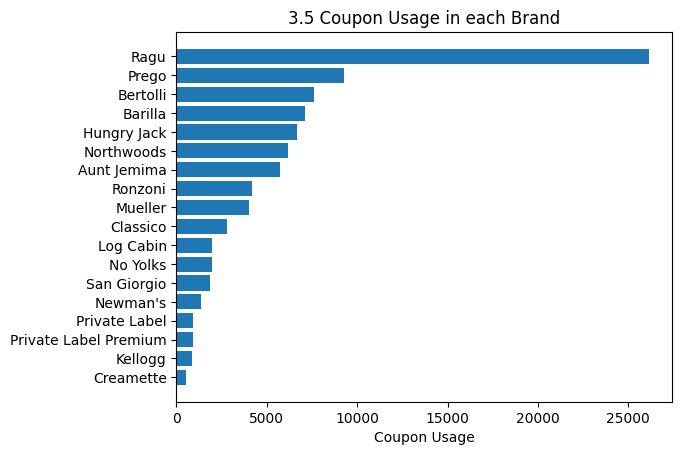

In [111]:
plt.barh(coupon_by_brand.index[::-1],coupon_by_brand.values[::-1])
plt.xlabel("Coupon Usage")
plt.title("3.5 Coupon Usage in each Brand")

## Conclusion

Assume that the coupon we distributed are not limited to be used on individual brand/commodity.
1. Customers are using coupons on pasta sauce the most commodity-wise.(plot 3.4)
2. Customers are using coupons on Ragu the most brand-wise.(plot 3.5)
3. In both case, the brand/commodity that coupon being used on the most isn't our best selling brand/commodity.
4. For this case, we can simply distributed coupons that specify to be use on our best selling brand/commodity(Private Label/Pasta) to try to increase our sales.

# Does Coupons encourage Customer to buy more items/come to our store more often

In [142]:
baskets_w_coupon = data[data["coupon"] == 1]["basket"].unique()

In [144]:
coupon_data = data[data["basket"].isin(baskets_w_coupon)]

In [147]:
non_coupon_data = data[~data["basket"].isin(baskets_w_coupon)]

In [149]:
coupon_baskets = coupon_data.groupby(['basket'])

In [150]:
non_coupon_baskets = non_coupon_data.groupby(['basket'])

In [151]:
item_counts_w_coupon = coupon_baskets["units"].sum().value_counts().to_numpy()
item_counts_wo_coupon = non_coupon_baskets["units"].sum().value_counts().to_numpy()

In [152]:
item_counts_w_coupon[4] = np.sum(item_counts_w_coupon[4:])
item_counts_w_coupon = item_counts_w_coupon[:5]

In [153]:
item_counts_wo_coupon[4] = np.sum(item_counts_wo_coupon[4:])
item_counts_wo_coupon = item_counts_wo_coupon[:5]

Text(0.5, 1.0, '3.6 Amount of Items Brought Per Basket When Coupon Is Used')

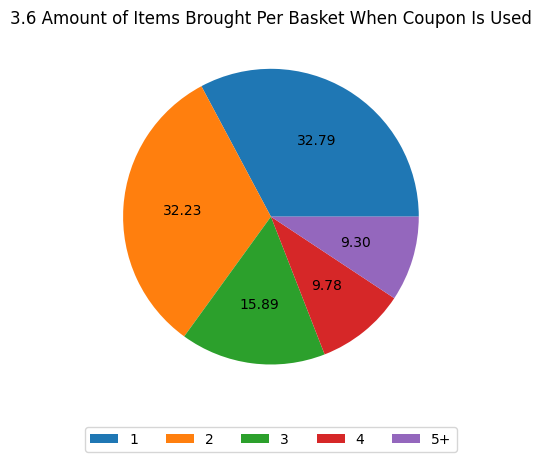

In [154]:
plt.pie(item_counts_w_coupon, labels = ["1","2","3","4","5+"],labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("3.6 Amount of Items Brought Per Basket When Coupon Is Used")

Text(0.5, 1.0, "3.7 Amount of Items Brought Per Basket When Coupon Isn't Used")

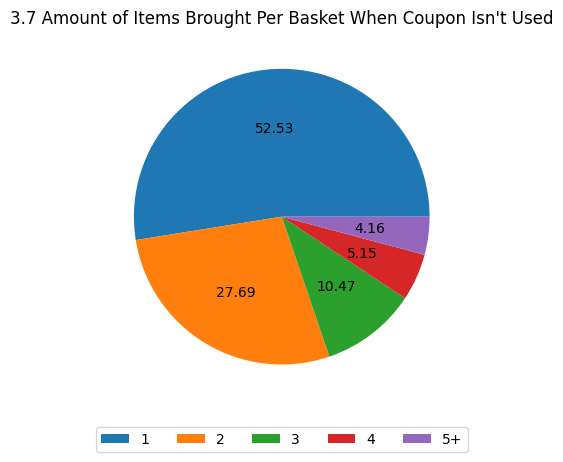

In [155]:
plt.pie(item_counts_wo_coupon, labels = ["1","2","3","4","5+"],labeldistance = None, autopct='%.2f')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, ncol=5)
plt.title("3.7 Amount of Items Brought Per Basket When Coupon Isn't Used")

In [191]:
basket_value_with_coupon = coupon_baskets["dollar_sales"].sum().to_numpy()
basket_value_without_coupon = non_coupon_baskets["dollar_sales"].sum().to_numpy()

In [194]:
# Remove Some Outlier
basket_value_with_coupon = basket_value_with_coupon[basket_value_with_coupon < 20]
basket_value_without_coupon = basket_value_without_coupon[basket_value_without_coupon < 20]

Text(0.5, 1.0, '3.8 Distribution of Value per Basket for Customers with Coupon')

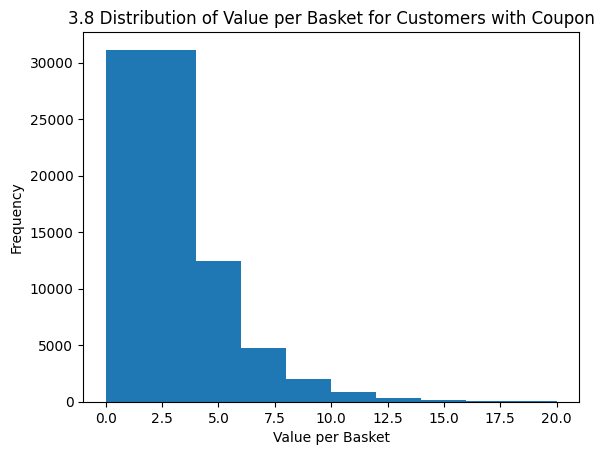

In [200]:
plt.hist(basket_value_wit_coupon, bins = np.arange(0,21,2))
plt.xlabel("Value per Basket")
plt.ylabel("Frequency")
plt.title("3.8 Distribution of Value per Basket for Customers with Coupon")

Text(0.5, 1.0, '3.9 Distribution of Value per Basket for Customers without Coupon')

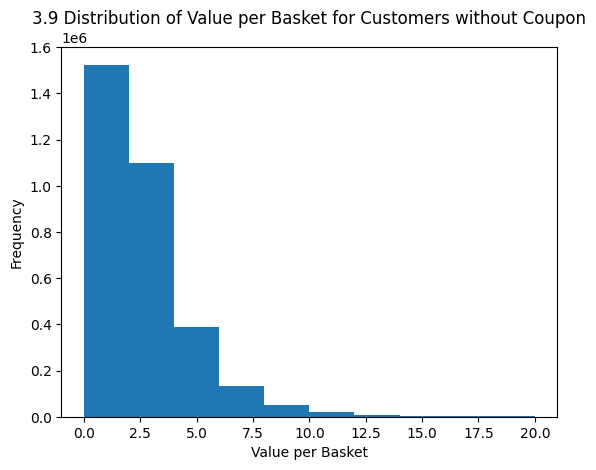

In [201]:
plt.hist(basket_value_without_coupon, bins = np.arange(0,21,2))
plt.xlabel("Value per Basket")
plt.ylabel("Frequency")
plt.title("3.9 Distribution of Value per Basket for Customers without Coupon")

In [202]:
np.average(basket_value_with_coupon), np.average(basket_value_without_coupon)

(3.0442579899049518, 2.732668436103317)

In [167]:
coupon_user = coupon_data["household"].unique()
non_coupon_user = non_coupon_data["household"].unique()

In [165]:
# Count how many times each household
s = time.time()
counter = defaultdict(int)
for basket_id in range(1,3316349+1):
    basket_data = baskets.get_group(basket_id)
    counter[basket_data["household"].values[0]] += 1
    if basket_id%200000 == 0:
        e = time.time()
        print(f"basket : {basket_id}, time: {e-s}")        

basket : 200000, time: 22.09588932991028
basket : 400000, time: 41.76801323890686
basket : 600000, time: 61.84830117225647
basket : 800000, time: 82.20172119140625
basket : 1000000, time: 100.96861124038696
basket : 1200000, time: 120.0000672340393
basket : 1400000, time: 139.42873215675354
basket : 1600000, time: 159.3066291809082
basket : 1800000, time: 178.24090433120728
basket : 2000000, time: 196.96439337730408
basket : 2200000, time: 217.7514669895172
basket : 2400000, time: 236.72349524497986
basket : 2600000, time: 255.6411383152008
basket : 2800000, time: 275.3702931404114
basket : 3000000, time: 294.8155822753906
basket : 3200000, time: 313.64048624038696


In [173]:
coupon_user_freq = np.array([counter[user] for user in coupon_user])
non_coupon_user_freq = np.array([counter[user] for user in non_coupon_user])

In [179]:
# Remove Some Outlier
coupon_user_freq = coupon_user_freq[coupon_user_freq < 100]
non_coupon_user_freq = non_coupon_user_freq[non_coupon_user_freq < 100]

Text(0.5, 1.0, '3.8 Distribution of Number of Times That Customers with Coupon Buy from Our Shop')

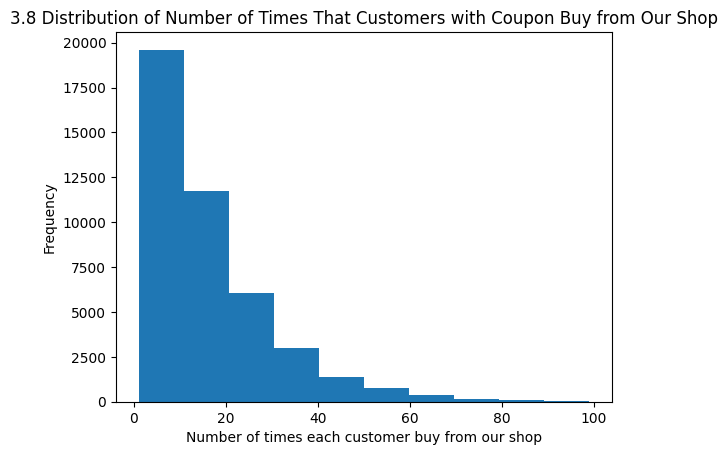

In [184]:
plt.hist(coupon_user_freq)
plt.xlabel("Number of times each customer buy from our shop")
plt.ylabel("Frequency")
plt.title("3.10 Distribution of Number of Times That Customers with Coupon Buy from Our Shop")

Text(0.5, 1.0, '3.9 Distribution of Number of Times That Customers without Coupon Buy from Our Shop')

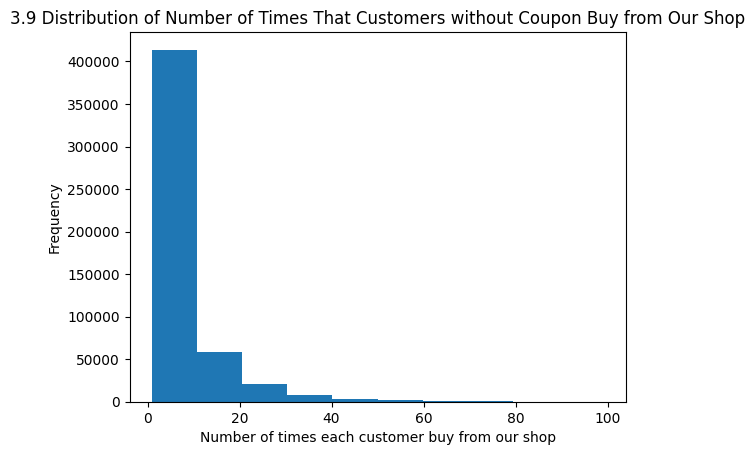

In [185]:
plt.hist(non_coupon_user_freq)
plt.xlabel("Number of times each customer buy from our shop")
plt.ylabel("Frequency")
plt.title("3.11 Distribution of Number of Times That Customers without Coupon Buy from Our Shop")

In [180]:
np.average(coupon_user_freq), np.average(non_coupon_user_freq)

(15.871099614291984, 6.510310770909621)

## Conclusion

1. Coupons have a significant effect on customers' behavior<br>
    -Customers are more likely to buy more than 1 product with coupon (47.47% up to 67.21%)<br>
    -Value per each basket is also increasing by \~10% when customers use coupon<br>
    -Customers that have coupon are trend to visited our store more often(\~2.44 times more often)<br>